In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_riders = pd.read_csv(r'C:\Users\maild\Downloads\day.csv')
df_riders.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Since 'instant' just represents a serial number and will not help us in any kind of analysis. We shall drop this

In [6]:
df_riders.drop(['instant'],axis=1,inplace=True)

In the below few lines we just try and have an overall look at the data to get a feel of what the overall dataset looks like

In [9]:
df_riders.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
df_riders.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


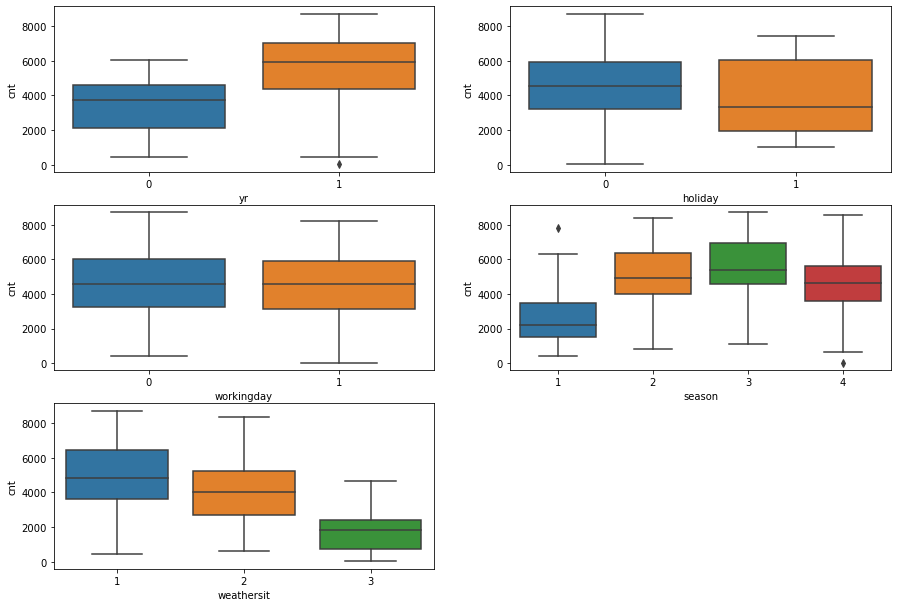

In [13]:
plt.figure(figsize=(15,14))
plt.subplot(4,2,1)
sns.boxplot(y='cnt', x='yr', data=df_riders)

plt.subplot(4,2,2)
sns.boxplot(y='cnt', x='holiday', data=df_riders)

plt.subplot(4,2,3)
sns.boxplot(y='cnt', x='workingday', data=df_riders)

plt.subplot(4,2,4)
sns.boxplot(y='cnt', x='season', data=df_riders)

plt.subplot(4,2,5)
sns.boxplot(y='cnt', x='weathersit', data=df_riders)

plt.show()

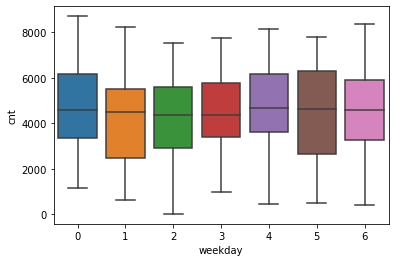

In [14]:
sns.boxplot(y='cnt', x='weekday', data=df_riders)
plt.show()

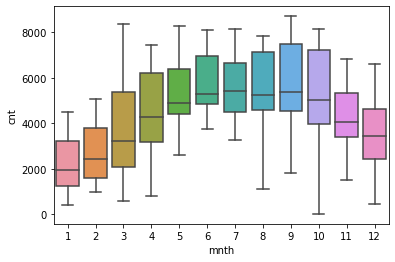

In [15]:
sns.boxplot(y='cnt', x='mnth', data=df_riders)
plt.show()

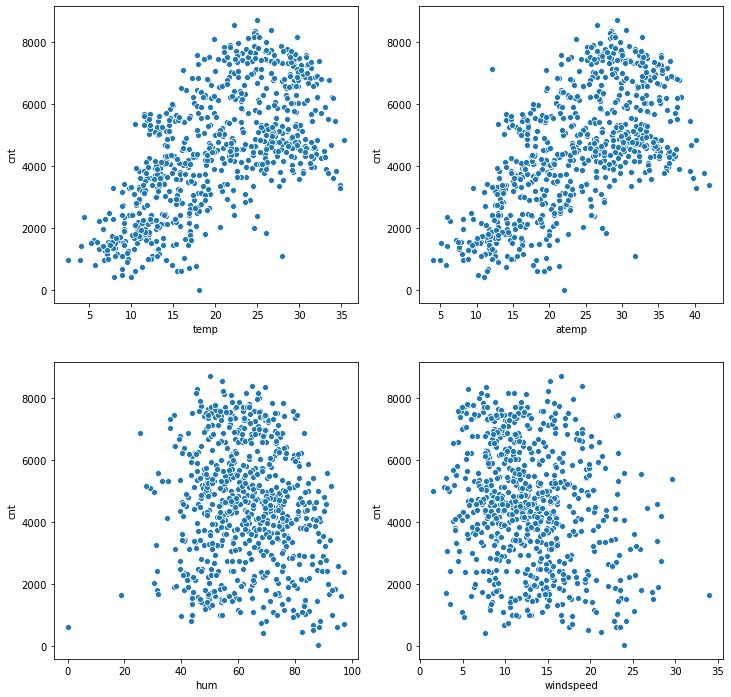

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.scatterplot(x='temp',y='cnt',data=df_riders)

plt.subplot(2,2,2)
sns.scatterplot(x='atemp',y='cnt',data=df_riders)

plt.subplot(2,2,3)
sns.scatterplot(x='hum',y='cnt',data=df_riders)

plt.subplot(2,2,4)
sns.scatterplot(x='windspeed',y='cnt',data=df_riders)


plt.show()

In [17]:
df_riders.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Since Casual and Registered users equate to the total count of riders. It makes sense to drop them as there should be other factors driving the count of ridership

In [18]:
df_riders.drop(['casual','registered'],axis=1,inplace=True)


Also, since we already have other information such as month of the day and whether the day was holiday or not workingday or not, it makes sense to drop the dteday variable.

In [19]:
df_riders.drop(['dteday'],axis=1,inplace=True)


In [20]:
df_riders.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [21]:
df_riders['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df_riders['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr', 5:'May', 6: 'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'},inplace=True)
df_riders['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
df_riders['weathersit'].replace({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow / Light Rain', 4:'Heavy Rain + Ice Pallets'},inplace=True)

In [22]:
df_riders.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


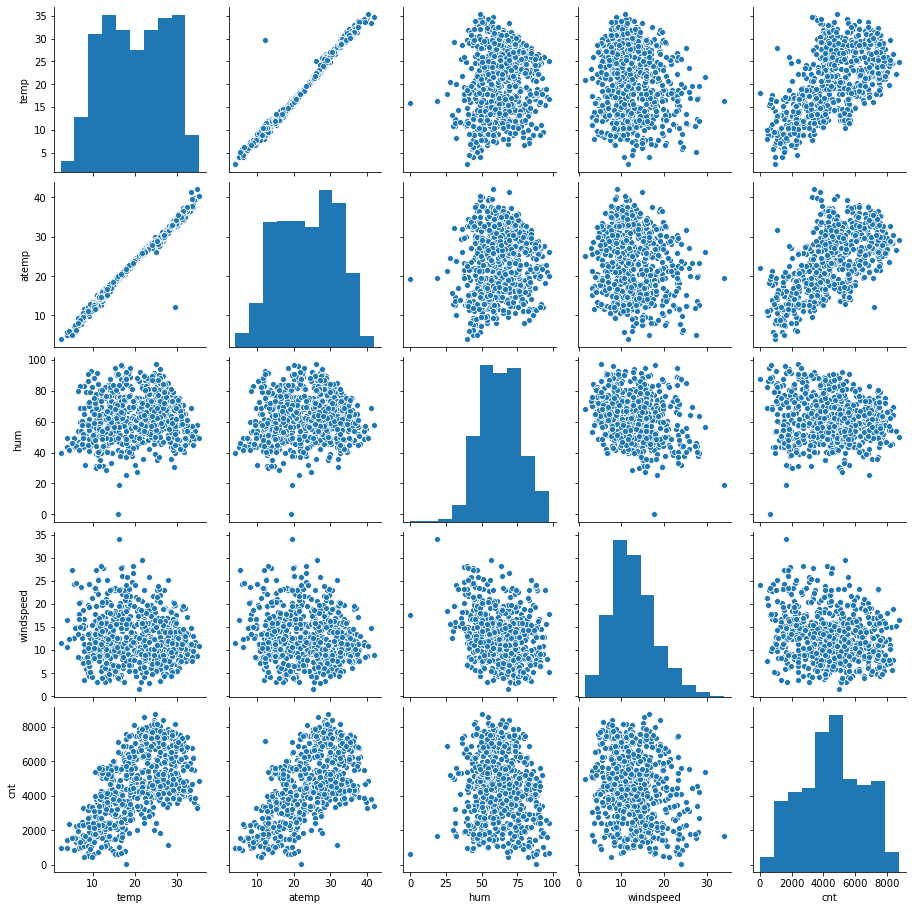

In [23]:
sns.pairplot(df_riders, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

From the above chart it is quite evident that there is an extremely high multicollinearity between 'temp' and 'atemp' variables. Hence we can drop any one of these two variables. We decide to drop 'temp'

In [24]:
df_riders.drop(['temp'],axis=1,inplace=True)


In [25]:
df_riders['mnth']=df_riders['mnth'].astype(object)
df_riders['season']=df_riders['season'].astype(object)
df_riders['weathersit']=df_riders['weathersit'].astype(object)
df_riders['weekday']=df_riders['weekday'].astype(object)
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [26]:
Season = pd.get_dummies(df_riders['season'], drop_first=True)
Month = pd.get_dummies(df_riders['mnth'], drop_first=True)
Weekday = pd.get_dummies(df_riders['weekday'], drop_first=True)
Weathersit = pd.get_dummies(df_riders['weathersit'], drop_first=True)

In [27]:
df_riders = pd.concat([df_riders,Season], axis=1)
df_riders = pd.concat([df_riders,Month], axis=1)
df_riders = pd.concat([df_riders,Weekday], axis=1)
df_riders = pd.concat([df_riders,Weathersit], axis=1)


In [28]:
df_riders.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow / Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [29]:
df_riders.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow / Light Rain,Mist + Cloudy
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_riders.dtypes

season                      object
yr                           int64
mnth                        object
holiday                      int64
weekday                     object
workingday                   int64
weathersit                  object
atemp                      float64
hum                        float64
windspeed                  float64
cnt                          int64
spring                       uint8
summer                       uint8
winter                       uint8
Aug                          uint8
Dec                          uint8
Feb                          uint8
Jan                          uint8
Jul                          uint8
Jun                          uint8
Mar                          uint8
May                          uint8
Nov                          uint8
Oct                          uint8
Sep                          uint8
Monday                       uint8
Saturday                     uint8
Sunday                       uint8
Thursday            

In [31]:
df_riders.drop(['season','mnth','weekday','weathersit'], inplace=True,axis=1)

In [32]:
df_train, df_test = train_test_split(df_riders, train_size=0.70, random_state=100)

In [33]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [34]:
num_vars=['atemp','hum','windspeed','cnt']

In [35]:
scaler = MinMaxScaler()

In [36]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow / Light Rain,Mist + Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


It is time to assign the target feature to y_train variable and the independent features to X_train model

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

Now we use RFE feature to select the best features for our model

In [39]:
LR = LinearRegression()
LR.fit(X_train, y_train)

rfe = RFE(LR, 15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 11),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Light Snow / Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [40]:
column_list = X_train.columns[rfe.support_]
column_list

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'Light Snow / Light Rain',
       'Mist + Cloudy'],
      dtype='object')

In [41]:
X_tr = X_train[column_list]

In [42]:
X_train_model = sm.add_constant(X_tr)

In [43]:
LR = sm.OLS(y_train, X_train_model).fit()

In [44]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.92e-186
Time:                        23:26:50   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2931      0.032      9.260      0.000       0.231       0.355
yr                          0.2312      0.008     28.305      0.000       0.215       0.247
holiday                    -0.0837      0.026     -3.226      0.001      -0.135      -0.033
atemp                       0.4782      0.032     14.978      0.000       0.415       0.541
hum                        -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed                  -0.1771      0.026     -6.783      0.000      -0.228      -0.126
summer                      0.0793      0.013      6.295      0.000       0.055       0.104
winter                      0.1342      0.014      9.373      0.000       0.106       0.162
Aug                         0.0606      0.016      3.695      0.000       0.028       0.093
Dec                        -0.0486      0.019     -2.622      0.009      -0.085      -0.012
Feb                        -0.0497      0.021     -2.348      0.019      -0.091      -0.008
Jan                        -0.0762      0.021     -3.577      0.000      -0.118      -0.034
Nov                        -0.0417      0.019     -2.186      0.029      -0.079      -0.004
Sep                         0.1121      0.017      6.709      0.000       0.079       0.145
Light Snow / Light Rain    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
Mist + Cloudy              -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()

vif['variables'] = X_tr.columns

vif['VIF'] = [variance_inflation_factor(X_tr.values,i) for i in range(X_tr.shape[1])]

vif = vif.sort_values(by = 'VIF', ascending= False)

vif

,variables,VIF
3,hum,25.061930
2,atemp,14.416366
4,windspeed,3.896229
6,winter,3.044972
5,summer,2.289840
14,Mist + Cloudy,2.238266
0,yr,2.061130
10,Jan,1.923712
11,Nov,1.865728
8,Dec,1.635629


Since the variable 'hum' has an extremely high VIF first we will eliminate it from our model. We shall take 5 as a threshold limit to decide whether we should eliminate a variable or not. 'hum' has a VIF way above our limit.

In [46]:
X_tr = X_train[column_list].drop('hum', axis=1)

In [47]:
X_train_model = sm.add_constant(X_tr)
LR = sm.OLS(y_train, X_train_model).fit()


In [48]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.01e-183
Time:                        23:29:22   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2097      0.026      8.204      0.000       0.160       0.260
yr                          0.2351      0.008     28.454      0.000       0.219       0.251
holiday                    -0.0850      0.026     -3.220      0.001      -0.137      -0.033
atemp                       0.4446      0.032     14.106      0.000       0.383       0.507
windspeed                  -0.1491      0.026     -5.791      0.000      -0.200      -0.098
summer                      0.0738      0.013      5.785      0.000       0.049       0.099
winter                      0.1226      0.014      8.564      0.000       0.094       0.151
Aug                         0.0580      0.017      3.474      0.001       0.025       0.091
Dec                        -0.0567      0.019     -3.021      0.003      -0.094      -0.020
Feb                        -0.0558      0.021     -2.601      0.010      -0.098      -0.014
Jan                        -0.0868      0.022     -4.034      0.000      -0.129      -0.045
Nov                        -0.0418      0.019     -2.153      0.032      -0.080      -0.004
Sep                         0.1048      0.017      6.194      0.000       0.072       0.138
Light Snow / Light Rain    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
Mist + Cloudy              -0.0814      0.009     -9.218      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()

vif['variables'] = X_tr.columns

vif['VIF'] = [variance_inflation_factor(X_tr.values,i) for i in range(X_tr.shape[1])]

vif = vif.sort_values(by = 'VIF', ascending= False)

vif

,variables,VIF
2,atemp,4.992460
3,windspeed,3.833038
5,winter,2.630325
0,yr,2.057817
4,summer,2.056994
10,Nov,1.819306
6,Aug,1.590898
13,Mist + Cloudy,1.571018
7,Dec,1.412212
11,Sep,1.347379


From the above summary and VIF table we could see that none of the variables have a high P-value and none of the variables have a VIF greater than 5. Hence we would take this as our final model now. Please note that adjusted R of 0.83 is quite good.

Hence now we shall compute our predicted y values in th train dataset and compare them with the actual y values in the train dataset to arrive at r_square score

In [51]:
y_train_pred = LR.predict(X_train_model)

In [53]:
r_square_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r_square_train

0.8351479474401463

So we arrive at a r_square value of 0.83 for our train dataset model. Now we shall repeat the above steps with the 'test' dataset and see if we get a similar r_square value. If we do it means our model is good enough predictive tool

In [54]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [55]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow / Light Rain,Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
X_te = df_test[column_list].drop('hum', axis=1)

X_test_model = sm.add_constant(X_te)

LR_test = sm.OLS(y_test, X_test_model).fit()

In [60]:
y_test_pred = LR_test.predict(X_test_model)

In [62]:
r_square_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r_square_test

0.8330215131549298

Hence we get a r_square value of 0.83 for our test dataset. 
Let us compare this with the value of our train dataset r_square and see if they are similar or not

In [64]:
print(r_square_test)
print(r_square_train)

0.8330215131549298
0.8351479474401463


As you can see above both the values are fairly similar. Which means our model is quite efficient

Now we shall plot the predicted y values vs actual y values

Text(0, 0.5, 'Actual Y values')

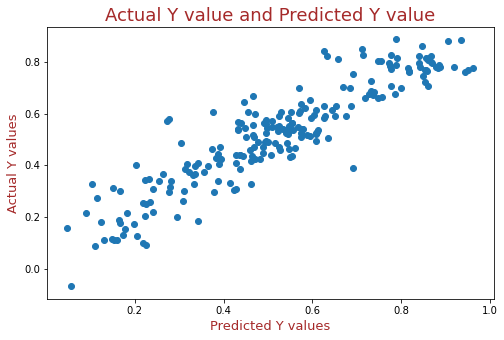

In [68]:
plt.figure(figsize = (8,5))

plt.scatter(y_test,y_test_pred)
plt.title('Actual Y value and Predicted Y value', fontsize=18, color ='brown')
plt.xlabel('Predicted Y values', fontsize=13, color ='brown')
plt.ylabel('Actual Y values', fontsize=13, color ='brown')

Hence we conclude the model is effective to be used for future datasets and as such the equation of the model can be denoted as 

cnt= 0.2097 + (0.2351 X yr) - (0.0850 X holiday) + (0.4456 X atemp) - (0.1491 X windspeed) + (0.0738 X summer) + (0.1226 X winter) + (0.0580 X Aug) - (0.0567 X Dec) - (Feb X 0.0558) - (Jan X 0.0868) - (Nov X 0.0418) + (Sep X 0.1048) 